# **【第4章】 本当にそうだろうか？：確証的データ分析**


## 01 データの理想型、正規分布：仮説検定を支える柱


リスト4-1

In [1]:
!pip install japanize-matplotlib
import pandas as pd
import numpy as np
import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=["IPAexGothic"])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=0cee1f55f8219bd95cab54fe633d6788797e9c627002232561f4ddbad83eedb8
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


リスト4-2

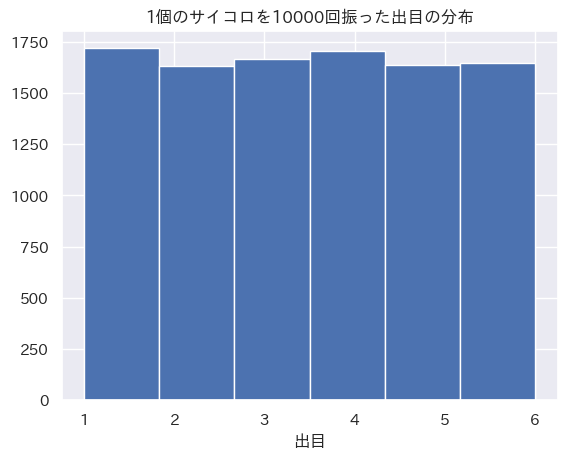

In [2]:
import random

# サイコロを10000回振った出目
dice_1 = []
for i in range(10000):
    dice_1.append(random.randint(1,6))
df = pd.DataFrame(dice_1)

# ヒストグラムの表示
df.hist(bins=6)
plt.title("1個のサイコロを10000回振った出目の分布")
plt.xlabel("出目")
plt.xticks(range(1,7))
plt.show()

リスト4-3

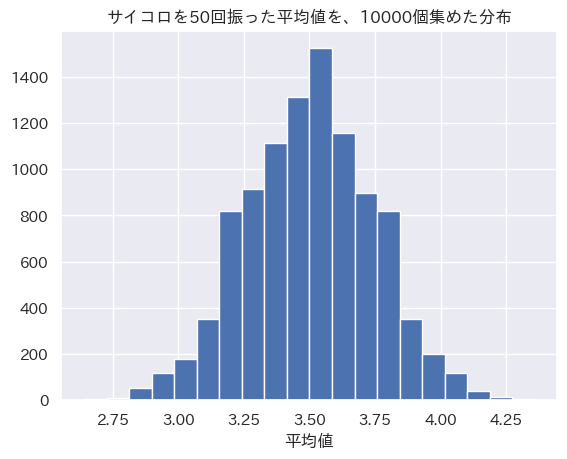

In [3]:
# サイコロを50回振った平均値を10000個集める
dice_50_avg = []
for i in range(10000):
    dice_50 = []
    for j in range(50):
        dice_50.append(random.randint(1,6))
    dice_50_avg.append(sum(dice_50)/50.0)

df = pd.DataFrame(dice_50_avg)

# ヒストグラムの表示
df.hist(bins=20)
plt.title("サイコロを50回振った平均値を、10000個集めた分布")
plt.xlabel("平均値")
plt.show()

## 03 仮説検定：仮説は、正しいのか？


リスト4-4

In [4]:
from statsmodels.stats.power import TTestIndPower

effect_size = 0.5 # 中程度の効果量
power = 0.8 # 通常の検出力
alpha = 0.05 # 有意水準

# サンプル数の計算
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha)
print(f"必要なサンプル数: {sample_size:.0f}")

必要なサンプル数: 64


リスト4-5

In [5]:
power = 0.8 # 通常の検出力
alpha = 0.05 # 有意水準

# サンプル数の計算
analysis = TTestIndPower()
for effect_size in [0.8, 0.5, 0.2]: # 効果量[大、中、小]
    sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha)
    print(f"効果量 {effect_size}：必要なサンプル数: {sample_size:.0f}")

効果量 0.8：必要なサンプル数: 26
効果量 0.5：必要なサンプル数: 64
効果量 0.2：必要なサンプル数: 393


リスト4-6

In [6]:
import scipy.stats as stats

# 朝ごはんを食べた点数と、食べなかった点数のデータ
df = pd.DataFrame({
    "EatBreakfast": [75, 82, 78, 80, 79, 85, 81, 82],
    "NoBreakfast": [70, 72, 68, 71, 69, 74, 72, 70]
})

# t検定の実行
t_statistic, p_value = stats.ttest_ind(df["EatBreakfast"], df["NoBreakfast"])

# 検定結果の表示
print(f"t統計量: {t_statistic:.8f}")
print(f"p値: {p_value:.8f}")

if p_value < 0.05:
    print("朝ごはんを食べるとテストの点数が上がる可能性が高いです。")
else:
    print("朝ごはんとテストの点数には明確な関係が見られませんでした。")

t統計量: 7.53568291
p値: 0.00000273
朝ごはんを食べるとテストの点数が上がる可能性が高いです。


リスト4-7

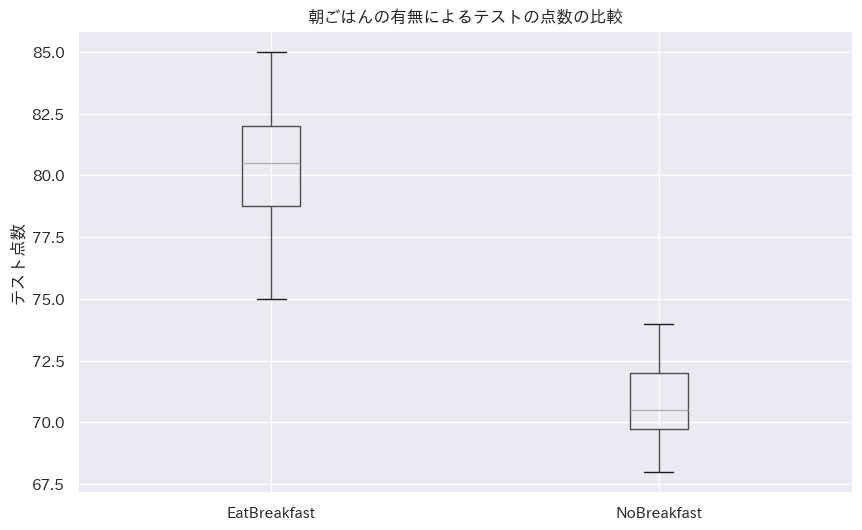

In [7]:
# 箱ひげ図の表示
plt.figure(figsize=(10, 6))
boxplot = df.boxplot(column=["EatBreakfast", "NoBreakfast"])
plt.title("朝ごはんの有無によるテストの点数の比較")
plt.ylabel("テスト点数")
plt.show()

リスト4-8

In [8]:
# 暗記の点数と、問題演習の点数と、グループ学習の点数のデータ
df = pd.DataFrame({
    "暗記": [75, 82, 78, 80, 79, 85, 81, 82],
    "問題演習": [80, 85, 88, 87, 82, 89, 86, 87],
    "グループ学習": [70, 72, 75, 78, 74, 76, 73, 75]
})

# 分散分析の実行
f_statistic, p_value = stats.f_oneway(df["暗記"], df["問題演習"], df["グループ学習"])

# 検定結果の表示
print(f"F統計量: {f_statistic:.8f}")
print(f"p値: {p_value:.8f}")

if p_value < 0.05:
    print("勉強方法によってテストの点数に差がある可能性が高いです。")
else:
    print("勉強方法による点数の明確な差は見られませんでした。")

F統計量: 31.58883249
p値: 0.00000047
勉強方法によってテストの点数に差がある可能性が高いです。


リスト4-9

In [9]:
# 男性、女性別の数学、国語の点数のデータ
df = pd.DataFrame({
    "数学": [70, 40],
    "国語": [30, 60]
}, index=["男性", "女性"])

# カイ二乗検定の実行
chi2, p_value, dof, expected = stats.chi2_contingency(df)

# 検定結果の表示
print(f"カイ二乗統計量: {chi2:.8f}")
print(f"p値: {p_value:.8f}")

if p_value < 0.05:
    print("性別と得意な教科には関連がある可能性が高いです。")
else:
    print("性別と得意な教科には明確な関連は見られませんでした。")

カイ二乗統計量: 16.98989899
p値: 0.00003758
性別と得意な教科には関連がある可能性が高いです。


## 04 予測モデリングとその評価：この予測モデルは、正しいのか？



リスト4-10

In [10]:
from sklearn.linear_model import LinearRegression

# 勉強時間と点数のデータ
df = pd.DataFrame({
    "study_hours": [1, 2, 3, 4, 5, 6, 7, 8],
    "test_scores": [60, 62, 67, 70, 78, 82, 83, 85]
})

# モデルの作成と学習
X = df[["study_hours"]]
y = df["test_scores"]
model = LinearRegression()
model.fit(X, y)

# 予測の実行
sh = 9
newdata = pd.DataFrame({
    "study_hours": [sh]
})
y_pred = model.predict(newdata)
print(f"{sh}時間勉強した場合の予測点数: {y_pred[0]:.2f}")

9時間勉強した場合の予測点数: 91.21


リスト4-11

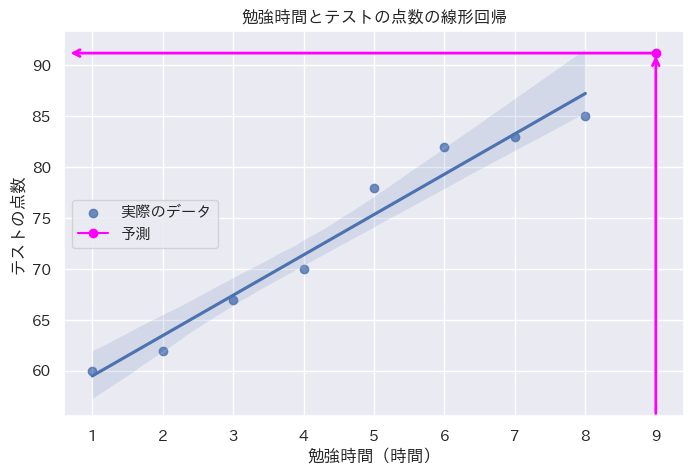

In [11]:
# 線形回帰の表示
plt.figure(figsize=(8, 5))
sns.regplot(x=df["study_hours"], y=df["test_scores"], label="実際のデータ")

# 予測の表示
ymin, ymax = plt.ylim()
xmin, xmax = plt.xlim()
plt.annotate(
    "", xy=(sh, y_pred), xytext=(sh, ymin),
    arrowprops=dict(arrowstyle="->", color="magenta", lw=2)
)
plt.annotate(
    "", xy=(sh, y_pred), xytext=(xmin, y_pred),
    arrowprops=dict(arrowstyle="<-", color="magenta", lw=2)
)
plt.plot(sh, y_pred, color="magenta", label="予測", marker="o")

# グラフを装飾して表示
plt.xlabel("勉強時間（時間）")
plt.ylabel("テストの点数")
plt.title("勉強時間とテストの点数の線形回帰")
plt.legend(loc="center left")
plt.show()

リスト4-12

In [ ]:
# 勉強時間と睡眠時間と点数のデータ
df = pd.DataFrame({
    "study_hours": [1, 2, 3, 4, 5, 6, 7, 8],
    "sleep_hours": [6, 7, 5, 8, 6, 7, 8, 6],
    "test_scores": [60, 62, 67, 70, 78, 82, 83, 85]
})

# モデルの作成と学習
X = df[["study_hours", "sleep_hours"]]
y = df["test_scores"]
model = LinearRegression()
model.fit(X, y)

# 予測の実行
sh = 9
sl = 7
newdata = pd.DataFrame({
    "study_hours": [sh],
    "sleep_hours": [sl]
})
y_pred = model.predict(newdata)
print(f"{sh}時間勉強して{sl}時間睡眠をとった場合の予測点数: {y_pred[0]:.2f}")

9時間勉強して7時間睡眠をとった場合の予測点数: 91.24


リスト4-13

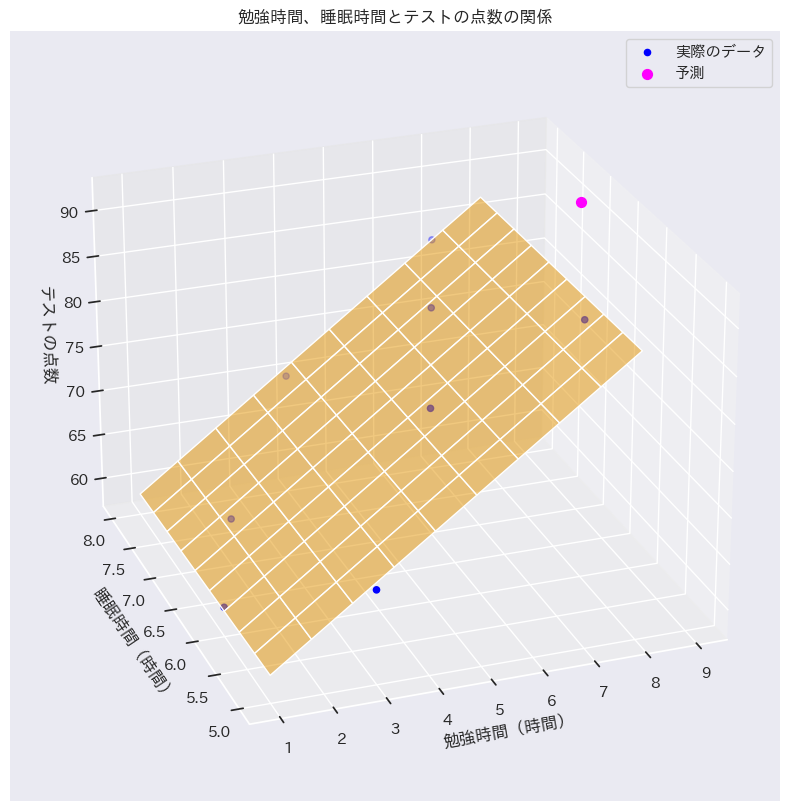

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 3Dプロットの作成
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection="3d")

# 3D散布図
ax.scatter(df["study_hours"], df["sleep_hours"], df["test_scores"], color="blue", label="実際のデータ")

# 回帰面表示用データ生成
study_hours_surf, sleep_hours_surf = np.meshgrid(np.linspace(1, 8, 10), np.linspace(5, 8, 10))
surf_data = pd.DataFrame({
    "study_hours": study_hours_surf.ravel(),
    "sleep_hours": sleep_hours_surf.ravel()
})
test_scores_surf = model.predict(surf_data).reshape(study_hours_surf.shape)

# 回帰面の表示
ax.plot_surface(study_hours_surf, sleep_hours_surf, test_scores_surf, color="orange", alpha=0.5)

# 予測の表示
ax.scatter(newdata["study_hours"], newdata["sleep_hours"], y_pred, color="magenta", s=50, label="予測")

# 3Dグラフの表示角度を設定
ax.view_init(25, 250)

# グラフを装飾して表示
ax.set_xlabel("勉強時間（時間）")
ax.set_ylabel("睡眠時間（時間）")
ax.set_zlabel("テストの点数")
ax.set_title("勉強時間、睡眠時間とテストの点数の関係")
ax.legend()
plt.show()

リスト4-14

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# モデルの評価
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# 評価結果の表示
print("モデルの評価結果:")
print(f"このモデルの決定係数（R²）は、{r2:.2f}なので、")
if r2 > 0.8:
    print("かなり良い当てはまりです。")
elif r2 > 0.6:
    print("まあまあの当てはまりです。")
else:
    print("あまり良い当てはまりとは言えません。")

print(f"\n平均二乗誤差（MSE）は、{mse:.2f}なので、")
print(f"平均的に{rmse:.2f}点程度の誤差が生じる可能性があることを示しています。")

print("\n総合評価:")
if r2 > 0.8 and rmse <= 3:
    print("このモデルは非常に良い性能を示しています。予測の信頼性が高いと言えるでしょう。")
elif r2 > 0.6 and rmse <= 6:
    print("このモデルはまあまあの性能です。精密な予測には注意が必要です。")
else:
    print("このモデルの性能はあまり高くありません。モデルの改善や他の要因の考慮が必要です。")

モデルの評価結果:
このモデルの決定係数（R²）は、0.97なので、
かなり良い当てはまりです。

平均二乗誤差（MSE）は、2.93なので、
平均的に1.71点程度の誤差が生じる可能性があることを示しています。

総合評価:
このモデルは非常に良い性能を示しています。予測の信頼性が高いと言えるでしょう。


リスト4-15

In [ ]:
from sklearn.linear_model import LogisticRegression

# テストの点と合否のデータ
df = pd.DataFrame({
    "scores": [70, 80, 90, 60, 50, 85, 75, 65],
    "results": [1, 1, 1, 0, 0, 1, 1, 0]
})

# 学習データの準備（データ数が少ないので全データを使っています）
X_train = df[["scores"]]
y_train = df["results"]

# モデルの作成と学習
model = LogisticRegression()
model.fit(X_train, y_train)

# 予測の実行
testscore = 80
X_test = pd.DataFrame({"scores": [testscore]})
prediction = model.predict(X_test)
probability = model.predict_proba(X_test)

print(f"{testscore}点の場合の予測結果：")
if prediction[0] == 1:
    print("合格")
else :
    print("不合格")
print(f"合格の確率: {probability[0][1]:.2f}")

80点の場合の予測結果：
合格
合格の確率: 1.00


リスト4-16

In [ ]:
# 予測の実行
testscore = 69
X_test = pd.DataFrame({"scores": [testscore]})
prediction = model.predict(X_test)
probability = model.predict_proba(X_test)


print(f"{testscore}点の場合の予測結果：")
if prediction[0] == 1:
    print("合格")
else :
    print("不合格")
print(f"合格の確率: {probability[0][1]:.2f}")

69点の場合の予測結果：
合格
合格の確率: 0.75


リスト4-17

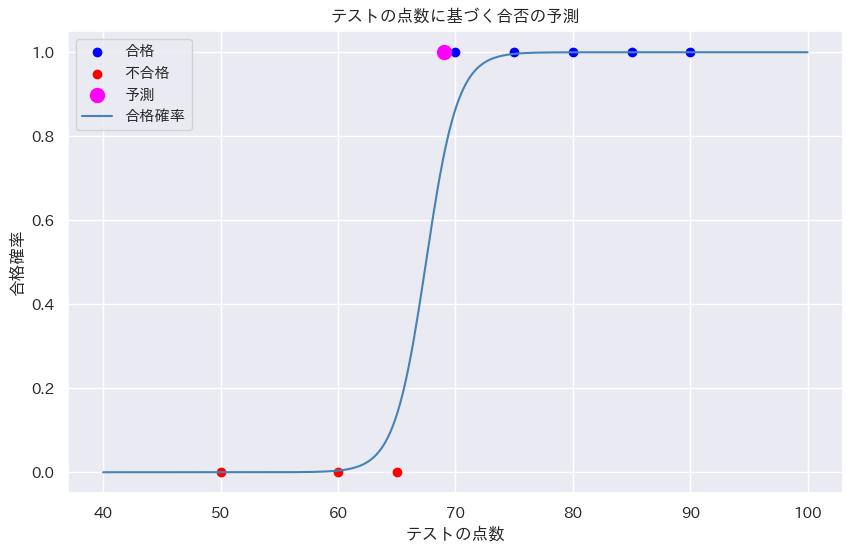

In [ ]:
# 実際のデータの散布図の表示
plt.figure(figsize=(10, 6))
plt.scatter(df[df["results"] == 1]["scores"], df[df["results"] == 1]["results"],
            color="blue", label="合格")
plt.scatter(df[df["results"] == 0]["scores"], df[df["results"] == 0]["results"],
            color="red", label="不合格")

# 予測結果を表示
plt.scatter(X_test, prediction, color="magenta", s=100, label="予測")

# ロジスティック回帰の曲線を表示
x = np.linspace(40, 100, 300)
y = model.predict_proba(pd.DataFrame({"scores": x}))[:, 1]
plt.plot(x, y, color="steelblue", label="合格確率")

# グラフを装飾して表示
plt.xlabel("テストの点数")
plt.ylabel("合格確率")
plt.title("テストの点数に基づく合否の予測")
plt.legend()
plt.show()

リスト4-18

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split

# テストの点と平常点と合否のデータ
data = pd.DataFrame({
    "test_score":  [67, 80, 60, 72, 72, 85, 75, 65, 55, 95, 40, 82, 77, 88, 92, 48, 58],
    "dialy_score": [85, 90, 70, 60, 40, 75, 95, 65, 55, 85, 50, 72, 78, 87, 93, 59, 75],
    "result":      [ 1,  1,  0,  1,  0,  1,  1,  0,  0,  1,  0,  1,  1,  1,  1,  0,  0]
})
X = data[["test_score", "dialy_score"]]
y = data["result"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

# モデルの作成と学習
model = svm.SVC(probability=True)
model.fit(X_train, y_train)

# 予測の実行
testscore = 85
dialyscore = 90
new_data = pd.DataFrame({
    "test_score": [testscore],
    "dialy_score": [dialyscore]
})
prediction = model.predict(new_data)
probability = model.predict_proba(new_data)

print(f"テスト{testscore}点、平常点{dialyscore}点の場合の予測結果：")
if prediction[0] == 1:
    print("合格")
else :
    print("不合格")
print(f"合格の確率: {probability[0][1]:.2f}")

テスト85点、平常点90点の場合の予測結果：
合格
合格の確率: 0.92


リスト4−19

In [ ]:
# 予測の実行
testscore = 72
dialyscore = 70
new_data = pd.DataFrame({
    "test_score": [testscore],
    "dialy_score": [dialyscore]
})
prediction = model.predict(new_data)
probability = model.predict_proba(new_data)

print(f"テスト{testscore}点、平常点{dialyscore}点の場合の予測結果：")
if prediction[0] == 1:
    print("合格")
else :
    print("不合格")
print(f"合格の確率: {probability[0][1]:.2f}")

テスト72点、平常点70点の場合の予測結果：
合格
合格の確率: 0.61


リスト4-20

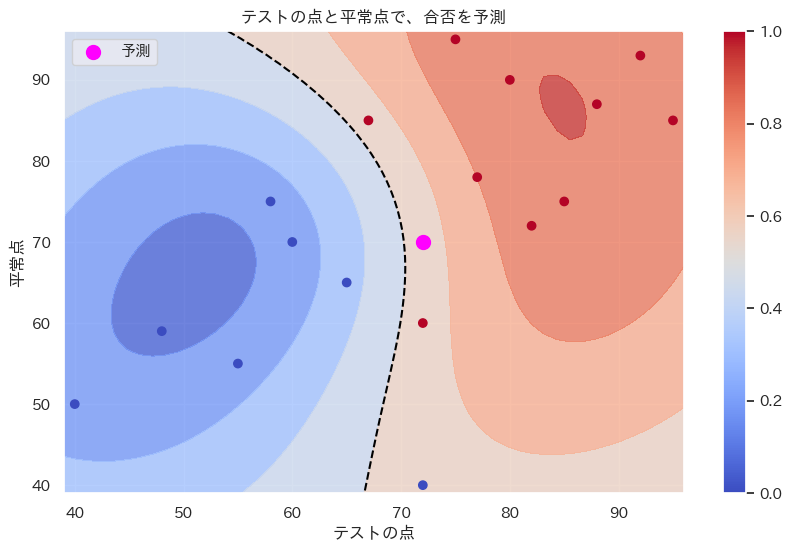

In [ ]:
# グラフの範囲を設定
x_min, x_max = X["test_score"].min() - 1, X["test_score"].max() + 1
y_min, y_max = X["dialy_score"].min() - 1, X["dialy_score"].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
Z = model.decision_function(pd.DataFrame({"test_score": xx.ravel(), "dialy_score": yy.ravel()}))
Z = Z.reshape(xx.shape)

# 決定境界を色で描画
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.8)
plt.contour(xx, yy, Z, levels=[0], colors="black", linestyles="--")

# 実際のデータの散布図を表示
scatter = plt.scatter(X["test_score"], X["dialy_score"], c=y, cmap="coolwarm")

# 予測結果を表示
plt.scatter(new_data["test_score"], new_data["dialy_score"], color="magenta", s=100, label="予測")

# グラフを装飾して表示
plt.xlabel("テストの点")
plt.ylabel("平常点")
plt.title("テストの点と平常点で、合否を予測")
plt.colorbar(scatter)
plt.legend()
plt.show()

リスト4-21

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# テストデータに対する予測
y_pred = model.predict(X_test)

# モデル評価
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"正解率: {accuracy:.2f}")
print(f"適合率: {precision:.2f}")
print(f"再現率: {recall:.2f}")
print(f"F1スコア: {f1:.2f}")

正解率: 0.80
適合率: 0.80
再現率: 1.00
F1スコア: 0.89
